# Figure 4: Evaluation of model performance

This notebook generates individual panels of Figure 4 in "Combining satellite imagery and machine learning to predict poverty".

In [153]:
from fig_utils import *
import matplotlib.pyplot as plt
import time

%matplotlib inline

## Transfer learning vs. nightlights

In these experiments, we compare the performance of the transfer learning model based on satellite imagery with the performance of a model that uses nightlights.

The parameters needed to produce the plots for Panels A and B are as follows:

- country_paths: Paths of directories containing pooled survey data
- percentiles: Wealth percentiles to evaluate
- survey: Either 'lsms' or 'dhs'
- dimension: Number of dimensions to reduce image features to using PCA
- k: Number of cross validation folds
- k_inner: Number of inner cross validation folds for selection of regularization parameter
- trials: Number of trials to average over
- poverty_line: International poverty line ($1.90/capita/day)
- multiples: Multiples of the poverty line to plot

For many trials, it will take several minutes or more to produce the plots. For 100 trials, it should take 40-60 minutes for LSMS and longer for DHS.

Each data directory should contain the following 4 files:

- conv_features.npy: (n, 4096) array containing image features corresponding to n clusters
- nightlights.npy: (n,) vector containing the average nightlights value for each cluster
- households.npy: (n,) vector containing the number of households for each cluster
- image_counts.npy: (n,) vector containing the number of images available for each cluster

Each data directory should also contain one of the following:

- consumptions.npy: (n,) vector containing average cluster consumption expenditures for LSMS surveys
- assets.npy: (n,) vector containing average cluster asset index for DHS surveys

Exact results may differ slightly with each run due to randomly splitting data into training and test sets.

#### Panel A: Pooled LSMS

In [148]:
country_path = '../data/output/LSMS/pooled/'
percentiles = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35,
               0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70,
               0.75, 0.80, 0.85, 0.90, 0.95, 1.00]
survey = 'lsms'
dimension = 10
k = 10
k_inner = 5
trials = 5
poverty_line = 1.90
multiples = [1, 2, 3]

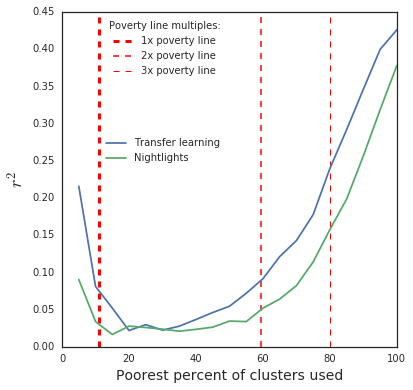

Finished in 121.461523056 seconds


In [149]:
t0 = time.time()
compare_models(country_path, survey, percentiles, dimension, k, k_inner,
             trials, poverty_line, multiples)
t1 = time.time()
print 'Finished in {} seconds'.format(t1-t0)

#### Panel B: Pooled DHS

In [151]:
country_path = '../data/output/DHS/pooled/'
percentiles = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35,
               0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70,
               0.75, 0.80, 0.85, 0.90, 0.95, 1.00]
survey = 'dhs'
dimension = 10
k = 5
k_inner = 3
trials = 3

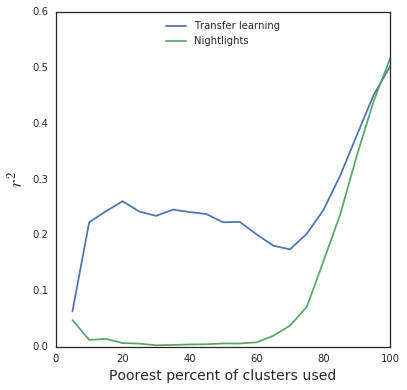

Finished in 187.415472984 seconds


In [152]:
t0 = time.time()
compare_models(country_path, survey, percentiles, dimension, k, k_inner,
             trials, poverty_line, multiples)
t1 = time.time()
print 'Finished in {} seconds'.format(t1-t0)

## Randomization tests

In these experiments, we randomly reassign daytime imagery to survey locations and retrain the model on incorrect images (see SM 1.7).

The parameters needed to produce the plots for Panels C and D are as follows:

- country_names: Names of countries as a list of lower-case strings
- country_paths: Paths of directories containing survey data corresponding to specified countries
- survey: Either 'lsms' or 'dhs'
- dimension: Number of dimensions to reduce image features to using PCA
- k: Number of cross validation folds
- k_inner: Number of inner cross validation folds for selection of regularization parameter
- points: Number of regularization parameters to try
- alpha_low: Log of smallest regularization parameter to try
- alpha_high: Log of largest regularization parameter to try
- trials: Number of trials for shuffled distribution

If trials is large (>100), producing the plots will take more than a couple of minutes.

Each data directory should contain the following 3 files:

- cluster_conv_features.npy: (n, 4096) array containing image features corresponding to n clusters
- cluster_households.npy: (n,) vector containing the number of households for each cluster
- cluster_image_counts.npy: (n,) vector containing the number of images available for each cluster

Each data directory should also contain one of the following:

- cluster_consumptions.npy: (n,) vector containing average cluster consumption expenditures for LSMS surveys
- cluster_assets.npy: (n,) vector containing average cluster asset index for DHS surveys

Exact results may differ slightly with each run due to randomly splitting data into training and test sets.

#### Panel C: LSMS consumption expenditures

In [50]:
# Parameters
country_names = ['nigeria', 'tanzania', 'uganda', 'malawi', 'pooled']
country_paths = ['../data/output/LSMS/nigeria/',
                '../data/output/LSMS/tanzania/',
                '../data/output/LSMS/uganda/',
                '../data/output/LSMS/malawi/',
                '../data/output/LSMS/pooled/']
survey = 'lsms'
dimension = 100
k = 3
k_inner = 3
points = 10
alpha_low = 0
alpha_high = 3
trials = 100

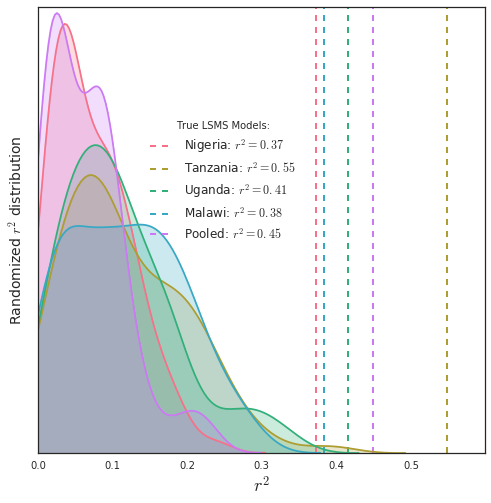

In [51]:
run_randomization_test(country_names, country_paths, survey, dimension,
                       k, k_inner, points, alpha_low, alpha_high, trials)

#### Panel D: DHS assets

In [52]:
# Parameters
country_names = ['nigeria', 'tanzania', 'uganda', 'malawi', 'rwanda', 'pooled']
country_paths = ['../data/output/DHS/nigeria/',
                '../data/output/DHS/tanzania/',
                '../data/output/DHS/uganda/',
                '../data/output/DHS/malawi/',
                '../data/output/DHS/rwanda/',
                '../data/output/DHS/pooled/']
survey = 'dhs'
dimension = 100
k = 3
k_inner = 3
points = 10
alpha_low = 0
alpha_high = 3
trials = 100

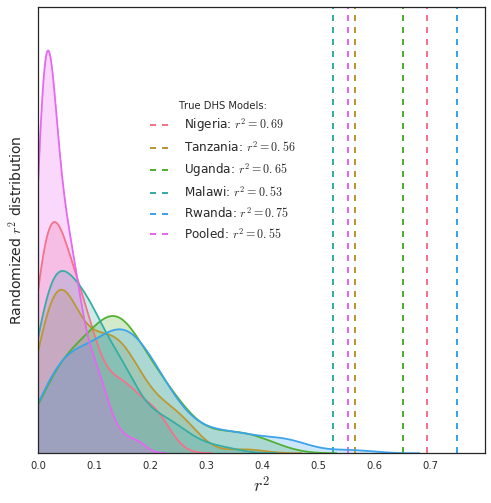

In [53]:
run_randomization_test(country_names, country_paths, survey, dimension,
                       k, k_inner, points, alpha_low, alpha_high, trials)